<a href="https://colab.research.google.com/github/palaciosalondra584-dev/Inteligencia_Artificial/blob/main/Multicapa/XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importamos la libreria numpy y tdods las operaciobes que se realizan por la operacion logica "XOR" las operaciones las albergamos en la variable "x" y las salidas esperadas por cada operacion en la varibles llamada "y"

In [17]:

import numpy as np

# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


#### Importamos de la biblioteca a tenserflow y de ella a Sequential: Que permite crear un modelo “en secuencia”, donde las capas se colocan una detrás de otra y a Dense: Que crea una capa totalmente conectada (cada neurona se conecta con todas las de la capa anterior).
####Despues definimos sus capas, donde la primera capa tiene 4 neuronas usando la funcion de "ReLU", con dos valores de entrada y la segunda que tiene una nuerona de salida ocupando un numero binario ya sea 0 o 1


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(4, activation='relu', input_dim=2),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


####Importamos el optimizador Adam desde Keras, un optimizador es como el “motor” que ajusta los pesos de las neuronas mientras la red aprende, definimos la tasa de aprendizaje de 0.01 y creamos un optimizador.

In [19]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)


####Utlizamos el método compile() configura cómo va a entrenar el modelo, usamos a la función de pérdida “loss” que mide qué tan mal lo está haciendo el modelo con el  objetivo del entrenamiento es minimizar esa pérdida y la metrica de rendimiento que mostrara.

In [20]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


#### Entrenamos a la re neuronal con las netradas "x" y las salidas "y", ajustando los pesos internos revisando los datos 50 veces y cada que corre los datos es una epoca estp cpn el fin de hacer las predicciones mas buenas, y verbose es para saber cuanto texto mostrar y en este caso entrenaremos en silencio, guardando el registro (history)

In [21]:
history = modelo.fit(
    X, y,
    epochs=50,
    verbose=0,
)

####Importamos matplotlib  para mostar graficamente como cambio la perdida a lo largo de las epocas,colocamos la indormacion del garfcio todo con el fin de visualizar si el modelo mejoro con el tiempo.

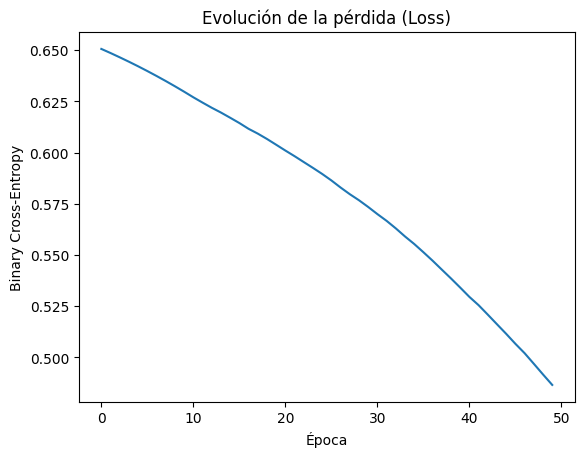

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()

####Medimos el rendimineto del modelo con los datos, con "loss" vemos que tan lejos estuvo de la respuesta correcta (del 1) y en accuary el porcentaje de precision

In [23]:
loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 1.0000 - loss: 0.4813
Loss: 0.48126235604286194, Accuracy: 1.0


#### Usa el modelo para predecir las salidas de las entradas, convierte las predicciones a cero o uno e imprime las predicciones

In [24]:
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0
